In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import kaldi_io
%matplotlib inline


In [2]:
from Define_Model.TDNN.TDNN import TDNN_v5

model = TDNN_v5(num_classes=5994, embedding_size=512, input_dim=161, alpha=0., input_norm='Mean')

In [3]:
checkpoint = torch.load('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/checkpoint/TDNN_v5/vox2/spect_STAP/soft_emsize512/checkpoint_50.pth')

In [4]:
model_dict = checkpoint['state_dict']
frame1_weight = model_dict['module.frame1.kernel.weight']
frame1_bias = model_dict['module.frame1.kernel.bias']

In [5]:
print(frame1_weight.shape)
print(frame1_bias.shape)

torch.Size([512, 161, 5])
torch.Size([512])


In [6]:
weight_mean = frame1_weight.cpu().numpy().mean(axis=2)
bias = frame1_bias.cpu().numpy()

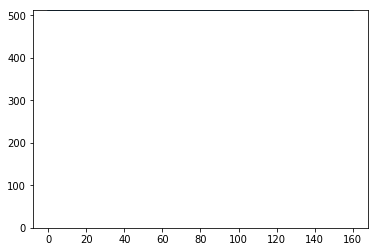

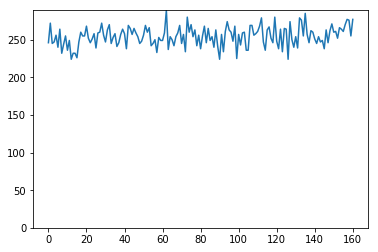

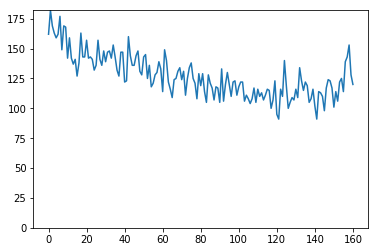

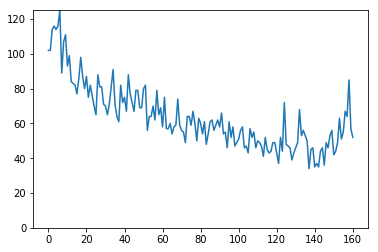

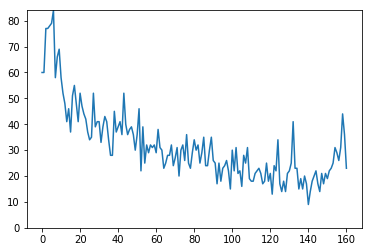

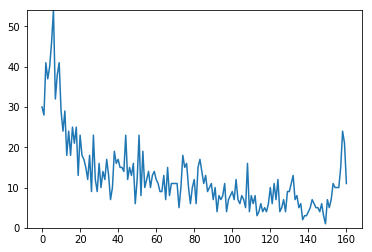

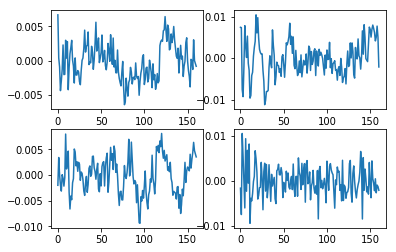

In [47]:
for maxn in [161, 80, 40, 20, 10, 4]:
    max_025_idx = np.argsort(weight_mean, axis=1)[:, -maxn:]

    max_025_idx = max_025_idx.reshape(-1)

    max_025_idx_uniq = np.unique(max_025_idx)
    max_025_idx_uniq.sort()
    counts = []
    for i in max_025_idx_uniq:
        counts.append(np.sum(max_025_idx==i))

    counts = np.array(counts)#/512/maxn
    plt.plot(max_025_idx_uniq, counts)
    plt.ylim(0,max(counts))
    plt.show()

for i in range(1, 5):
    ax = plt.subplot(2,2,i)
    plt.plot(weight_mean[i])
plt.show()

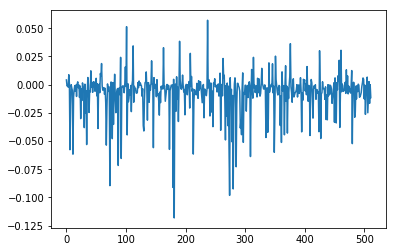

In [24]:
# counts = np.array(counts)
plt.plot(bias)
plt.show()


In [25]:
input_x = kaldi_io.read_mat('/home/work2020/yangwenhao/project/lstm_speaker_verification/data/vox2/egs/spect/spectrogram/dev_log/feat.0.ark:5')

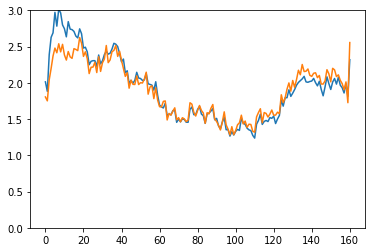

In [26]:
input_x_mean = input_x - input_x.mean(axis=0).reshape(1, -1)
mag_input = np.abs(input_x_mean).mean(axis=0)

plt.plot(mag_input)
plt.plot(mag_input*counts/counts.mean())
plt.ylim(0,3)
plt.show()